# 1. Regression and Correlation

### Linear Regression

Up to this point, we have been applying statistical and probabilistic rules to anticipate events (Probability) and to compare data (Inference). We now look beyond to the real power of statistics which is **Prediction**.

In order to predict we need to model data. We need to create an imperfect and more simplistic view of our data that could be extrapolated to unseen aspects of our outcome variable.

Linear regression is a simple yet powerful modeling technique that permit us to model an outcome as a function on *one* or *multiple* predictor or explanatory variable.

With simple linear regressions we can explore the **strength of the association** between a quatitative outcome and another quantitative variable the predictor. We can predict values from the model or/and make inferences (statistical tests of associations) regarding associations in the dataset.

### How does it work

The main Goal is to Find a linear function based on X to best yield Y.


X = “covariate” = “feature” = “predictor” = “regressor” = “independent variable”

Y = “response variable” = “outcome” = “dependent variable”





$$r(x) = E (Y|X = x)$$

Goal: Estimate function r



### Simple linear Regression

$$ Y_i = \beta_0 + \beta_1X + \epsilon_i, for i = 1,...,n$$

![title](L_reg.png)


where $\beta_0$ and $\beta_1$ are two unknown constants that represent the intercept and slope, also known as **coefficients** or **parameters**, n is the number of observations in the dataset, and $\epsilon$ is the **error** term



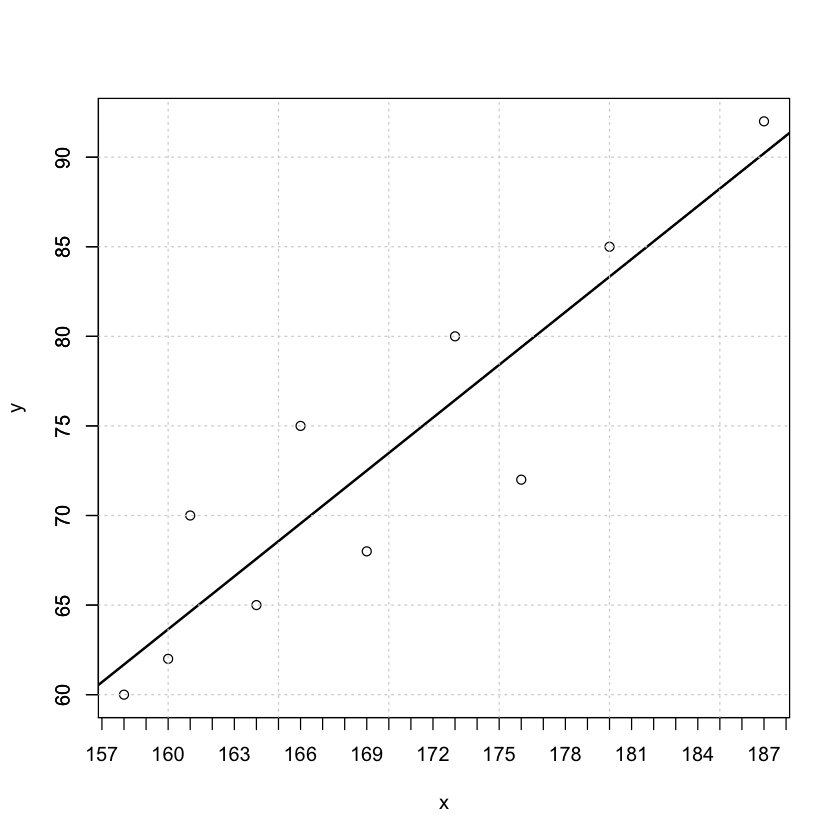

In [4]:
x <- c(173, 169, 176, 166, 161, 164, 160, 158, 180, 187)
y <- c(80, 68, 72, 75, 70, 65, 62, 60, 85, 92) # plot scatterplot and the regression line

# Linear model
# y as a function of x
mod1 <- lm(y ~ x) 

plot(x, y, xaxt="n")
axis(side=1, at = seq(150, 190, by = 1))
axis(side=2, at= seq(60,95,5))

# abline - take a linear model, plot a line
abline(mod1, lwd=2) 

grid(nx = NULL,ny = NULL)

In [ ]:
mod1

### $\beta_0$ Intercept: Predicted value when x = 0

### $\beta_1$ Slope: Predicted increase of y, for a unit increase in x

However, we never know the true coefficients $\beta_0$ and $\beta_1$ from the population, but we can estimate them using the sample parameters $\hat{\beta_0}$ $\hat{\beta_1}$  

#### lm() is the function in R that calculates the sample parameters from the data and find the "best" coefficients. What is not captured by the coefficients (the noise) is captured by the residuals

Residual $$\epsilon = Y_i - \bar{Y}_i$$

In [10]:
residuals(mod1)

1         2         3         4         5         6         7         8 
 3.557892 -4.506432 -7.393864  5.445324  5.364918 -2.586838 -1.651163 -1.683325 
        9        10 
 1.670460  1.783028


The downloaded binary packages are in
	/var/folders/4w/71fy66cs0fg7gh1mvdp8x8540000gn/T//Rtmpx8tmot/downloaded_packages


Loading required package: MASS


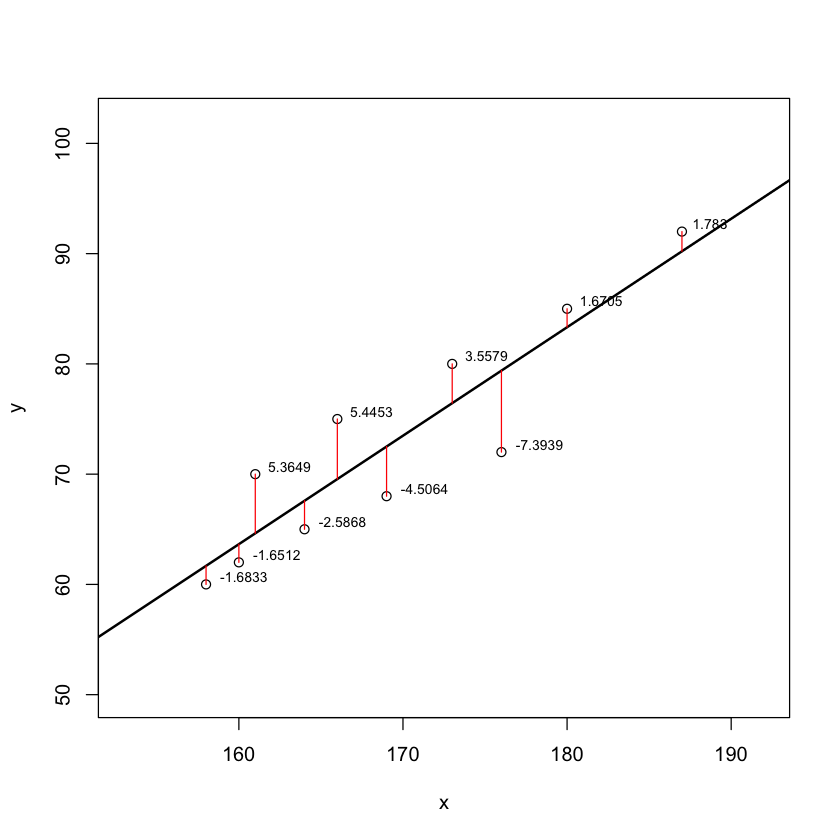

In [6]:
# calculate residuals and predicted values
plot(x, y, xlim=c(min(x)-5, max(x)+5), ylim=c(min(y)-10, max(y)+10))
abline(mod1, lwd=2)
res <- signif(residuals(mod1), 5)
pre <- predict(mod1) # plot distances between points and the regression line
segments(x, y, x, pre, col="red")

# add labels (residual values) to points
install.packages("calibrate")
library(calibrate)
textxy(x, y, res, cex=0.7)

How do we get that function? Using the Least Squares criteria, which minimizes the sum of squares residuals. There is only one Least Squares regression line.

Let's review an example taken from the book by Baumer, Benjamin S. "Modern Data Science with R", that helps to demonstrate the general applications of linear regressions. 

This dataset was collected by the The Pioneer Valley Planning Commission (PVPC) which collected data north of Chestnut Street in Florence, Massachusetts for a ninety day period. Data collectors set up a laser sensor that recorded when a rail-trail user passed the data collection station.
 
First lest install two libraries

In [12]:
install.packages("mosaic")

also installing the dependencies ‘bindr’, ‘mnormt’, ‘assertthat’, ‘bindrcpp’, ‘rlang’, ‘BH’, ‘plogr’, ‘purrr’, ‘tidyselect’, ‘hms’, ‘psych’, ‘dplyr’, ‘ggformula’, ‘mosaicData’, ‘mosaicCore’, ‘tidyr’, ‘readr’, ‘latticeExtra’, ‘ggdendro’, ‘gridExtra’, ‘glue’, ‘broom’




  There are binary versions available but the source versions are later:
        binary source needs_compilation
plogr    0.1-1  0.2.0             FALSE
psych 1.7.3.21  1.7.8             FALSE


The downloaded binary packages are in
	/var/folders/4w/71fy66cs0fg7gh1mvdp8x8540000gn/T//Rtmpx8tmot/downloaded_packages


installing the source packages ‘plogr’, ‘psych’



In [13]:
library(mosaic)
library(tibble)
glimpse(RailTrail)

Warning message:
“package ‘mosaic’ was built under R version 3.4.3”Loading required package: dplyr
Warning message:
“package ‘dplyr’ was built under R version 3.4.2”
Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggformula
Warning message:
“package ‘ggformula’ was built under R version 3.4.3”Loading required package: ggplot2

New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")
Loading required package: mosaicData
Warning message:
“package ‘mosaicData’ was built under R version 3.4.3”Loading required package: Matrix

The 'mosaic' package masks several functions from core packages in order to add 
additional featur

Observations: 90
Variables: 11
$ hightemp   <int> 83, 73, 74, 95, 44, 69, 66, 66, 80, 79, 78, 65, 41, 59, ...
$ lowtemp    <int> 50, 49, 52, 61, 52, 54, 39, 38, 55, 45, 55, 48, 49, 35, ...
$ avgtemp    <dbl> 66.5, 61.0, 63.0, 78.0, 48.0, 61.5, 52.5, 52.0, 67.5, 62...
$ spring     <int> 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,...
$ summer     <int> 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,...
$ fall       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,...
$ cloudcover <dbl> 7.6, 6.3, 7.5, 2.6, 10.0, 6.6, 2.4, 0.0, 3.8, 4.1, 8.5, ...
$ precip     <dbl> 0.00, 0.29, 0.32, 0.00, 0.14, 0.02, 0.00, 0.00, 0.00, 0....
$ volume     <int> 501, 419, 397, 385, 200, 375, 417, 629, 533, 547, 432, 4...
$ weekday    <lgl> TRUE, TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, FALSE, FALSE,...
$ dayType    <chr> "weekday", "weekday", "weekday", "weekend", "weekday", "...


Let's explore first the relationship between daily ridership (i.e., the number of riders and walkers who use the bike path on any given day) and a collection of explanatory variables, including the temperature, rainfall, cloud cover, and day of the week.

Let's start with one single qualitative variable, high temperature. 

We can visualize such relationship by plotting the scatterplot

Remember that our independent variable or our predictor is the variable that can randomly change (this one is our x axis). The Response variable, is the variable that changes (or not) as a function of the predictor (Y axis). In our example, the dependent variable is the number of riders and walkers who use the bike a day (Volume)

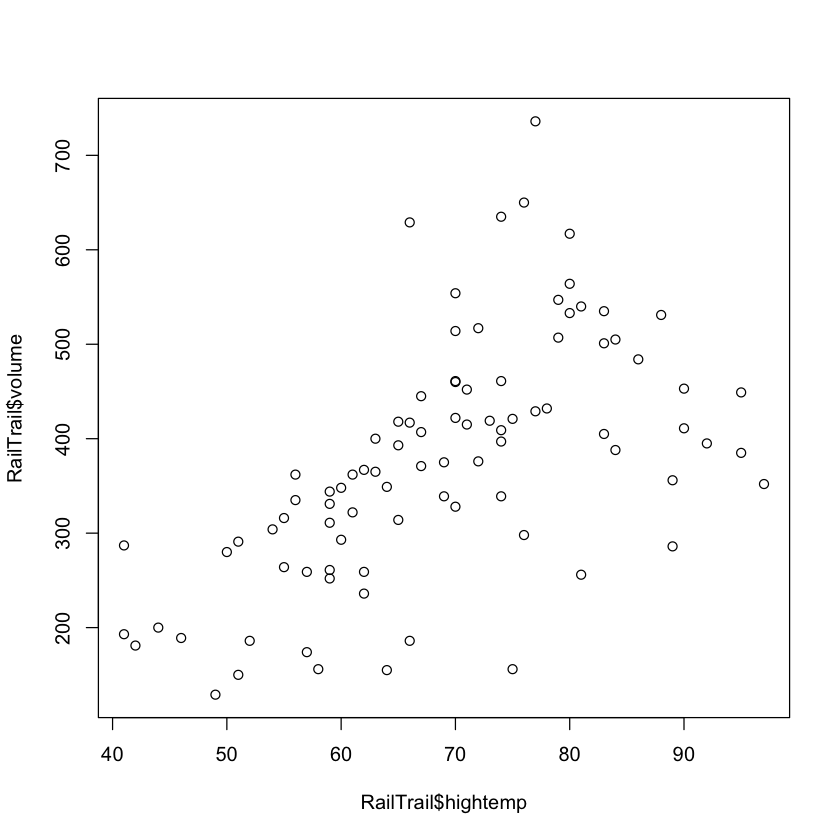

In [15]:
plot(RailTrail$hightemp, RailTrail$volume) ##What do you see

Now lets calculate the coefficients from this linear model:

In [17]:
mod <- lm(volume ~ hightemp, data = RailTrail) 
coef(mod)

(Intercept)    hightemp 
 -17.079281    5.701878

##### Remember the intercept is $\hat{\beta_0}$ from the linear equation and $\hat{\beta_1}$ is the slope of the line. We can conclude two things:

1. In the coldest days, when the high temperature was 0 Fahrenheit, the mean rider frequency is -17 (this is not possible). Probably at these extreme temperatures the monitoring equipment was not working very well.

2. This is the most important extrapolation from the linear model which is that for each increase in 1 degree Fahrenheit, we increase about 5.7 riders a day. 

we can visualize this model scatterplot also : 

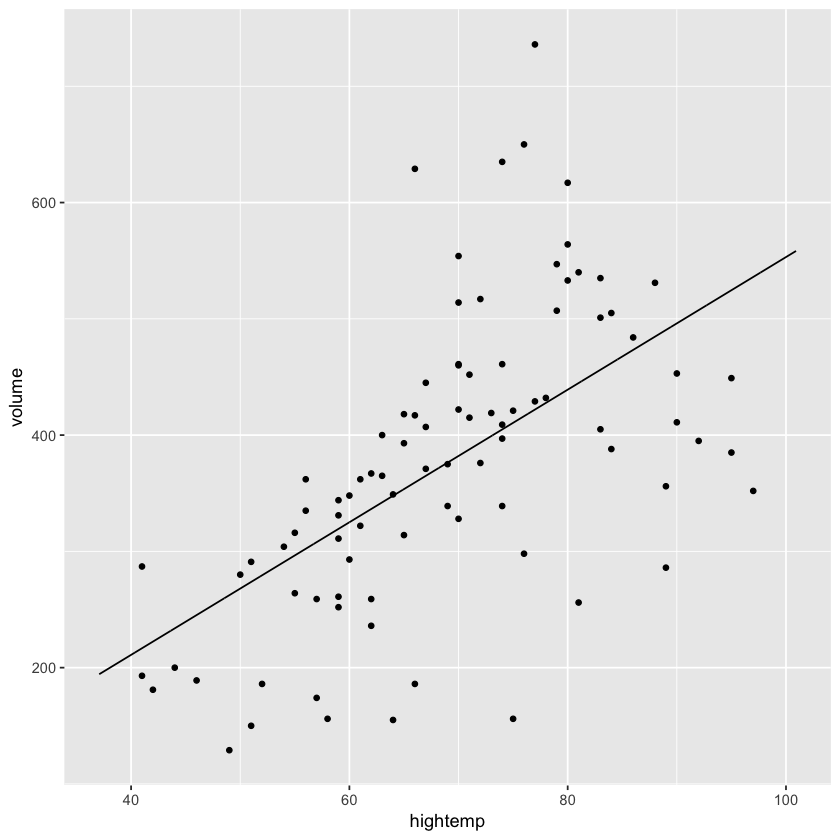

In [18]:
# One-call function to plot a predicted line
plotModel(mod, system = "ggplot2")

### What else we can get from a linear regression?

How does our model compares with a null model ? What is the null model

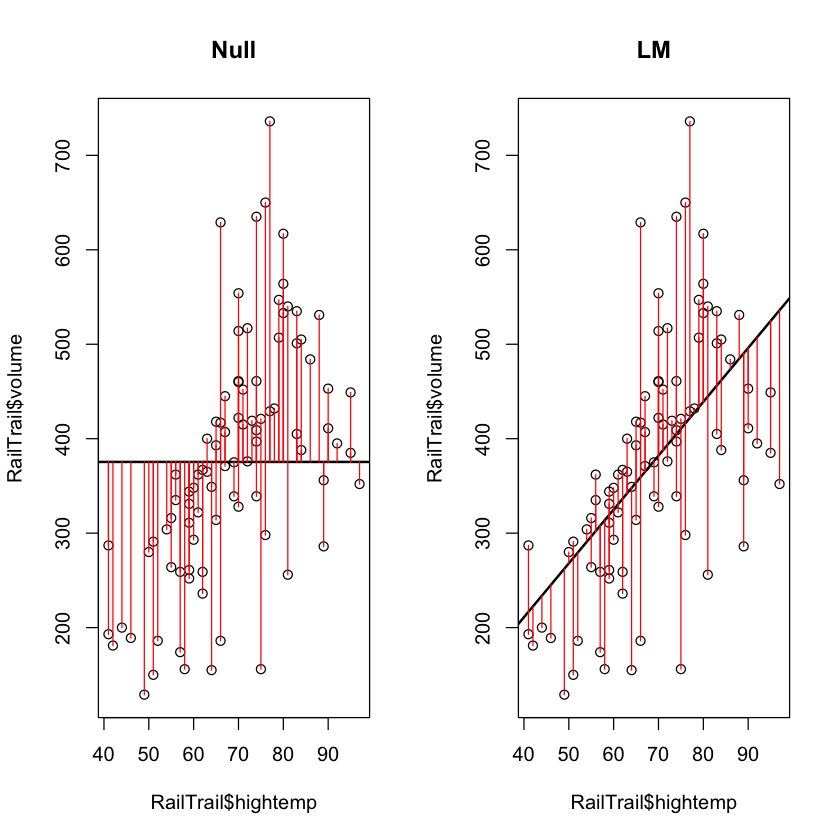

In [20]:
par(mfrow=c(1,2))
plot(RailTrail$hightemp, RailTrail$volume)
abline(h = 375.4, lwd=2)
pre2 = sapply(RailTrail$volume, function(x) x-375.4)
res_mod2 <- signif(pre2, 5)
segments(RailTrail$hightemp, RailTrail$volume, RailTrail$hightemp, 375.4, col="red")
#textxy(RailTrail$hightemp, RailTrail$volume, res_mod2, cex=0.7)
title(main="Null")
    
plot(RailTrail$hightemp, RailTrail$volume)
abline(mod, lwd=2)
res_mod <- signif(residuals(mod), 5)
pre <- predict(mod) # plot distances between points and the regression line
segments(RailTrail$hightemp, RailTrail$volume, RailTrail$hightemp, pre, col="red")
title(main="LM")


In order to asses how well fit our linear model to our data we need to obtain a measurement of strenght of the linear relationship, which is our correlation coefficient r

## Correlation

The main difference between correlation and simple linear regression is that in correlation we are not interested in investigating the effect of our independent variable on the dependent variable, but rather to understand the strenght of the association between two continuous variables.

## Pearson Correlation

Pearson's correlation coefficient is the covariance of two continuous variables divided by the product of their standard deviations.

$$r = \frac{\Sigma(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\Sigma(x_i - \bar{x})^2\Sigma(y_i - \bar{y})^2}}$$

or Equally

$$r = \displaystyle \frac{1}{n-1} \sum_{i=1}^n \left( \frac{x_i - \bar{x}}{s_x}\right) \left( \frac{y_i - \bar{y}}{s_y}\right)$$

What does the two summed factors remind you off? 

Z-scores right?, what we are doing here is standarizing the two variables to be equate $\hat{\beta_0}$ =0 and  $\hat{\beta_1}$ = r

In [21]:
cor_res <- cor.test(RailTrail$volume, RailTrail$hightemp, 
                method = "pearson")
cor_res


	Pearson's product-moment correlation

data:  x and y
t = 6.7239, df = 88, p-value = 1.705e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4269959 0.7046502
sample estimates:
      cor 
0.5825719 


Correlation coefficient is ranges between -1 and 1:

-  -1 indicates a strong negative correlation : this means that every time x increases, y decreases (left panel figure)
-  0 means that there is no association between the two variables (x and y) (middle panel figure)
-  1 indicates a strong positive correlation : this means that y increases with x (right panel figure)

![title](Correlation.png)
Image taken From: [http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r](http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r)

# Remember: that having an association it does not mean that the association is real and that the variables are affecting each other.

# Correlation doesn't imply causation

Some funny examples [http://www.tylervigen.com/spurious-correlations](http://www.tylervigen.com/spurious-correlations) 

But it also happens in real science: see first example on wikipedia [https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)

## In linear models we can also measure the goodness of fit:

Another way of examining whether the regression line shows a relationship between the two variables is to determine how well the line fits the observed data points.

We can use the data contained on the error predictors and generate a single statistic called $\large {R^2}$ or goodness of fit of the regression line

$\large {R^2}$ is a measure the proportion of variation in the response variable (y) that is explained by the model in a similar fashion (Baumer 2017).

$\large {R^2}$ is a proportion of variation and it ranges from 0 to 1, for simple linear regressions 

$$\large {R^2} = 1- \frac {SSE}{SST} = \frac {SSM}{SST}$$

$$               = 1- \frac {\sum_{i=1}^n (y_i - \hat{y})^2}{\sum_{i=1}^n (y_i - \bar{y})^2} = \frac {SSM}{SST}$$

$$           = 1- \frac {SSE}{(n-1)Var(y)}$$


where SSE is the sum of the squared residuals, SSM is the sum of the squares attributed to the model, and SST is the total sum of the squares. Let’s calculate these values for the rail trail example.

In [23]:
n <- nrow(RailTrail) 
SST <- var(~volume, data = RailTrail) * (n - 1) 
SSE <- var(residuals(mod)) * (n - 1) 
1 - SSE / SST
# Temperature accounts for 34% of the outcome variable (number of people)
rsquared(mod) 

[1] 0.33939

[1] 0.33939

In [1]:
# F-statistic: inference test for the regression. 
#    This shows that the Linear model is significant (there is a correlation)
# t-test: inference test for the variable (volume)
#     

# This shows that hightemp has a significant impact on volume

summary(mod)

ERROR: Error in summary(mod): object 'mod' not found


## We say that the regression model based on average daily temperature explained about 34% of the variation in daily ridership.

### Categorical predictor variables

Following our example of usage of rail trail, we were wondering if maybe there was a difference in the relationship between volume and the time of the week (weekdays or weekends). looking at the data set we see that...

In [25]:
glimpse(RailTrail)

Observations: 90
Variables: 11
$ hightemp   <int> 83, 73, 74, 95, 44, 69, 66, 66, 80, 79, 78, 65, 41, 59, ...
$ lowtemp    <int> 50, 49, 52, 61, 52, 54, 39, 38, 55, 45, 55, 48, 49, 35, ...
$ avgtemp    <dbl> 66.5, 61.0, 63.0, 78.0, 48.0, 61.5, 52.5, 52.0, 67.5, 62...
$ spring     <int> 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,...
$ summer     <int> 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,...
$ fall       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,...
$ cloudcover <dbl> 7.6, 6.3, 7.5, 2.6, 10.0, 6.6, 2.4, 0.0, 3.8, 4.1, 8.5, ...
$ precip     <dbl> 0.00, 0.29, 0.32, 0.00, 0.14, 0.02, 0.00, 0.00, 0.00, 0....
$ volume     <int> 501, 419, 397, 385, 200, 375, 417, 629, 533, 547, 432, 4...
$ weekday    <lgl> TRUE, TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, FALSE, FALSE,...
$ dayType    <chr> "weekday", "weekday", "weekday", "weekend", "weekday", "...


Weekday is a binary variable (whether it was a weekday or not) Other examples of binary variables are gender, we can also have categorial variables that are not binary (days of the week, socioeconomical status -low,middle,high- etc.

our linear model becomes:

$$\hat{Volume} = \beta_0+\beta_1 * weekday $$

In [26]:
#calculate the coefficients
coef(lm(volume ~ weekday, data = RailTrail))

(Intercept) weekdayTRUE 
  430.71429   -80.29493

In [27]:
mean(volume ~ weekday, data = RailTrail)
diff(mean(volume ~ weekday, data = RailTrail))

FALSE     TRUE 
430.7143 350.4194

TRUE 
-80.29493

The above result can be interpreted as we expect 80 less riders on weekdays (which was 1 in our variable) than on the weekend. 

We can transform our variable to make it easier to analyse:

In [30]:
RailTrail <- RailTrail %>% mutate(day = ifelse(weekday == 1, "weekday", "weekend/holiday"))
coef(lm(volume ~ day, data = RailTrail))
glimpse(RailTrail)

(Intercept) dayweekend/holiday 
         350.41935           80.29493

Observations: 90
Variables: 12
$ hightemp   <int> 83, 73, 74, 95, 44, 69, 66, 66, 80, 79, 78, 65, 41, 59, ...
$ lowtemp    <int> 50, 49, 52, 61, 52, 54, 39, 38, 55, 45, 55, 48, 49, 35, ...
$ avgtemp    <dbl> 66.5, 61.0, 63.0, 78.0, 48.0, 61.5, 52.5, 52.0, 67.5, 62...
$ spring     <int> 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,...
$ summer     <int> 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,...
$ fall       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,...
$ cloudcover <dbl> 7.6, 6.3, 7.5, 2.6, 10.0, 6.6, 2.4, 0.0, 3.8, 4.1, 8.5, ...
$ precip     <dbl> 0.00, 0.29, 0.32, 0.00, 0.14, 0.02, 0.00, 0.00, 0.00, 0....
$ volume     <int> 501, 419, 397, 385, 200, 375, 417, 629, 533, 547, 432, 4...
$ weekday    <lgl> TRUE, TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, FALSE, FALSE,...
$ dayType    <chr> "weekday", "weekday", "weekday", "weekend", "weekday", "...
$ day        <chr> "weekday", "weekday", "weekday", "weekend/holiday", "wee...


In [31]:
coef(lm(volume ~ day, data = RailTrail))

(Intercept) dayweekend/holiday 
         350.41935           80.29493

the interpretation of the model remains the same: On a weekday, 80 more riders are expected on a weekend or holiday than during weekdays.


In [32]:
day_vol = lm(volume ~ day, data = RailTrail)
summary(day_vol)


Call:
lm(formula = volume ~ day, data = RailTrail)

Residuals:
     Min       1Q   Median       3Q      Max 
-301.714  -91.419    5.081   80.831  305.286 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          350.42      15.56  22.515  < 2e-16 ***
dayweekend/holiday    80.29      27.90   2.878  0.00503 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 122.5 on 88 degrees of freedom
Multiple R-squared:  0.08601,	Adjusted R-squared:  0.07562 
F-statistic: 8.281 on 1 and 88 DF,  p-value: 0.005028


# Multiple linear regression

In multiple linear regression, we have the oportunity to add new predictor variables, and it's goal is to model the effect of multiple predictors on the response (outcome) variable.

\begin{equation*}
Y_i=\beta_0+\beta_1\,X_{1}+\beta_2\,X_{2}+\cdots+\beta_p\,X_{p}+\epsilon_i. \end{equation*} where $\epsilon ~ N(0,\sigma_\epsilon)$


Each new estimated coefficient ($\hat\beta_i$'s) is conditioned upon the other variables **WHEN THE OTHER VARIABLES ARE CONSTANT**. Each coefficient contributes a porcentage of variation that predicts the change of y with one-unit increase in $x_i$

### MLR with a categorial variable 

If we want to understand what is the overall effect of temperature and the categorial variable of weekdays, we can create a MLR that includes both coefficients:

$$\hat{Y}=\hat{\beta}_0+\hat{\beta}_1\,X_{1}+\hat{\beta}_2\,X_{2} $$

X1 is quantitative and X2 is categorical (where 1 = weekdays and 0 = weekends)

Where x2 = 0 (weekdays) then we have simply:
$$\hat{Y}=\hat{\beta}_0+\hat{\beta}_1\,X_{1}$$

where x2 = 1

$$\hat{Y}=(\hat{\beta}_0+\hat{\beta}_2) + \hat{\beta}_1\,X_{1}$$

This is called a **parallel slope model**

In [33]:
mod_parallel <- lm(volume ~ hightemp + weekday, data = RailTrail) 
coef(mod_parallel)
rsquared(mod_parallel)

(Intercept)    hightemp weekdayTRUE 
  42.806573    5.347817  -51.553496

[1] 0.3735356

## How would you interpret these coefficients?

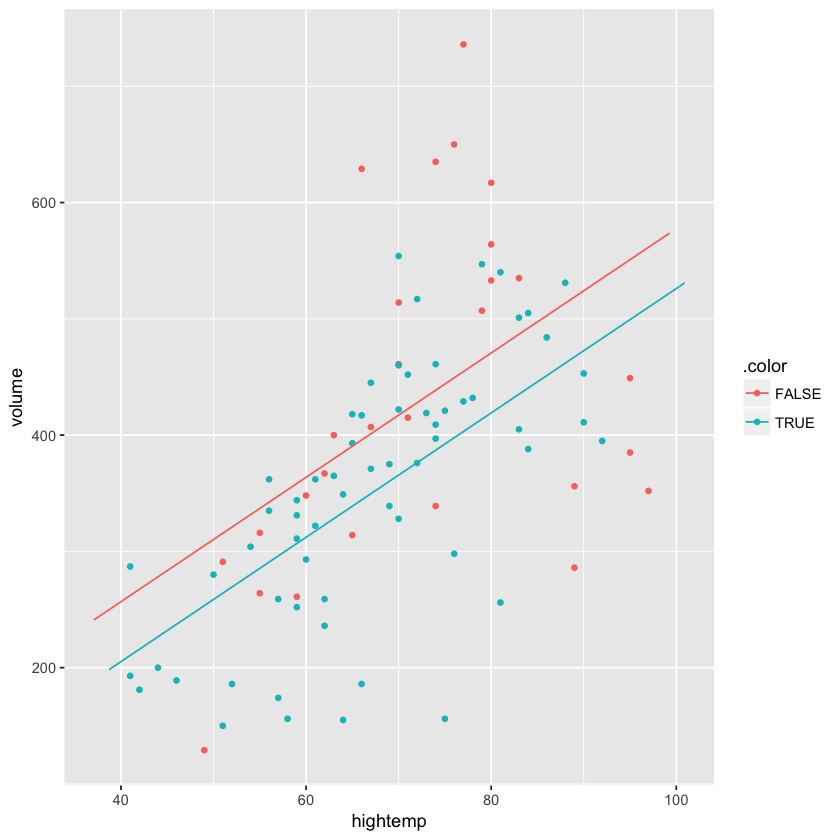

In [34]:
plotModel(mod_parallel, system = "ggplot2")

## Parallel planes: MLR with a second quantitative variable

If we include in our model multiple quantitative variables, we cannot represent the model as parallel lines but as multidimentional planes which different amounts of variation being added from each predictor.

following our example we can add an interesting variable that intuition predicts has a large effect on volume (Precipitation), lets create the model and calculate the parameters.

In [38]:
mod_p_planes <- lm(volume ~ hightemp + precip, data = RailTrail) 
coef(mod_p_planes)
rsquared(mod_p_planes) # These variables explain 38% of the variation of the outcome


(Intercept)    hightemp      precip 
 -31.519670    6.117745 -153.260844

[1] 0.4376559

As expected precipitation has a large effect on volume, we will interpret these coefficients as one increase in temperature increases volume by 6.11 riders a day (which is different that in our simple model) after controlling for the ammount of precipitation. Precipitation has a large effect, **controlling for temperature** by decreasing rail trail usage by 153 riders for each unit increase in precipitation.

## Interactions:

So far we had constructed model where the predictor variables contributed to the overall response independently. We can also model the effect of the interaction of two predictors in the response variable.

Our linear equation becomes:

$$\hat{Y}=\hat{\beta}_0+\hat{\beta}_1\,X_{1}+\hat{\beta}_2\,X_{2}+\hat{\beta}_3\,(X_{1}*X_{2}) $$

For weekends:
$$\hat{Y}| _{x1,x2} = 0 =\hat{\beta}_0+\hat{\beta}_1\,X_{1}$$

For weekdayes:

$$\hat{Y}| _{x1,x2} = 1 =\hat{\beta}_0+\hat{\beta}_1\,X_{1}+\hat{\beta}_2*1+\hat{\beta}_3\,X_{1}$$

This is called an **interaction model **
 

In [43]:
mod_interact <- lm(volume ~ hightemp + weekday + hightemp * weekday, data = RailTrail)
coef(mod_interact)

rsquared(mod_interact)
 

(Intercept)             hightemp          weekdayTRUE 
          135.152955             4.074701          -186.377005 
hightemp:weekdayTRUE 
            1.905580

[1] 0.3816309

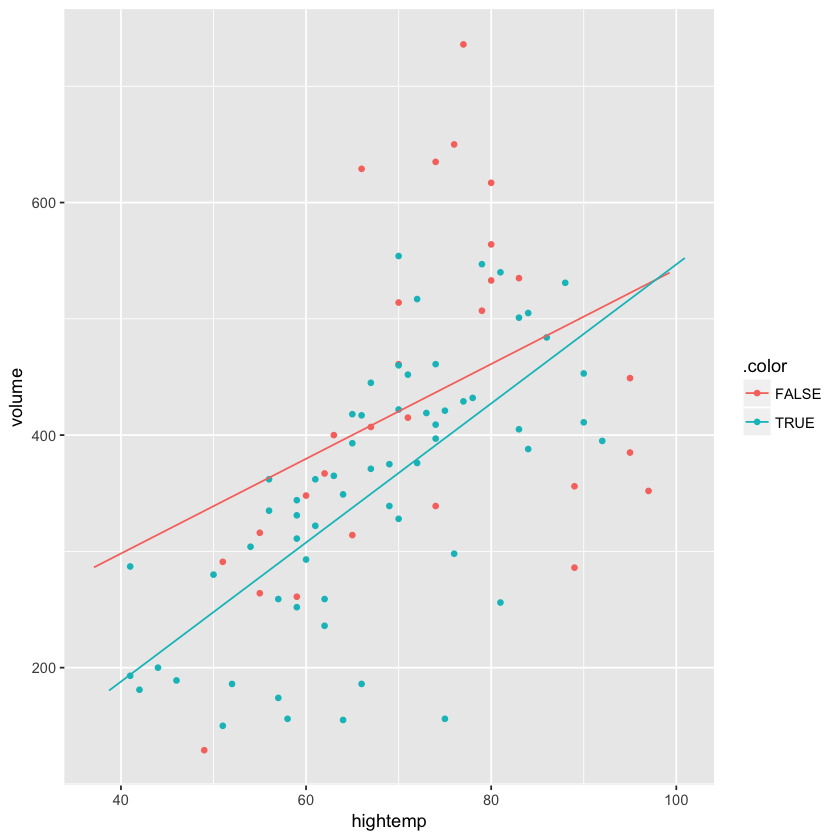

In [41]:
plotModel(mod_interact, system = "ggplot2")

We see that the slope on weekdays is about two riders per degree higher than on weekends and holidays. This may indicate that trail users on weekends and holidays are less concerned about the temperature than on weekdays. Baumer, Benjamin S. Modern Data Science with R. Chapman & Hall.


## How about non-linear relationships

MLR works well when the variables behave in a linear manner, but in many ocassions this is not always true. There are many different variables that change their slope as they increase in value (For example, age and height). Lets model this relationship from data taken on female subjects. 

Lets plot the relationship between age and height using both a linear relationship or using a smoother (function LOESS). The smoother (remember kernel density plots?) allow to fit the distribution of the data much better than a linear function would.


The downloaded binary packages are in
	/var/folders/4w/71fy66cs0fg7gh1mvdp8x8540000gn/T//Rtmpx8tmot/downloaded_packages


Warning message:
“Removed 12 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 12 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 12 rows containing missing values (geom_point).”

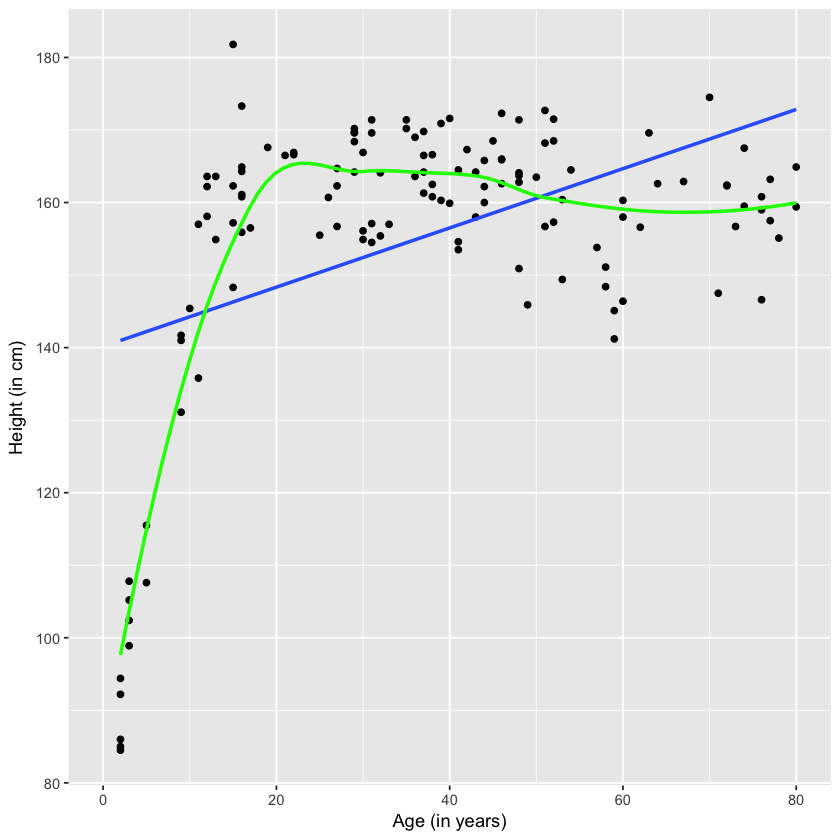

In [45]:
# Normal distributions are likely linear
# Highly skewed are likely non-linear

install.packages("NHANES")
library(NHANES) 
NHANES %>%
sample(300) %>%
filter(Gender == "female") %>% 
ggplot(aes(x = Age, y = Height)) +
geom_point() + 
stat_smooth(method = lm, se = 0) + 
stat_smooth(method = loess, se = 0, color = "green") + 
xlab("Age (in years)") + ylab("Height (in cm)")

You can see that the fit of the smoother is much better than the fit from the linear model. However, smoothers create a buffer of possible fits that is larger than linear models. let's look at the confidence intervals of the relationship between volume and high temperature in the rail Tail dataset.

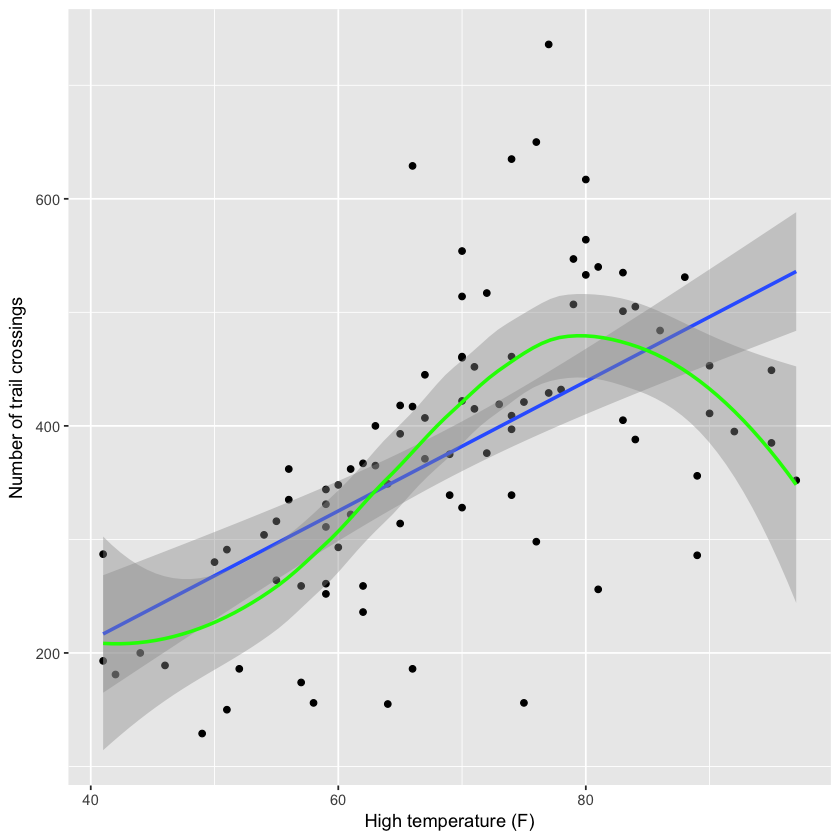

In [46]:
ggplot(data = RailTrail, aes(x = hightemp, y = volume)) + 
geom_point() + 
stat_smooth(method = lm) + 
stat_smooth(method = loess, color = "green") + 
ylab("Number of trail crossings") + xlab("High temperature (F)")
 

The data looks like a better fit in using the non-linear function, however, the confidence intervals, especially at the edges of the distribution is much larger (less certainty).

## Inference of linear models

All of the coefficient estimations we have done so far relate to the estimation to the sample coefficients. We haven't said anything about the true coefficients which are unknown. 

We can use inference statistics in order to model each one of the distribution of the sample coefficients against the true coefficients using t-distributions.

In [47]:
msummary(mod_p_planes)

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -31.5197    55.2383  -0.571  0.56973    
hightemp       6.1177     0.7941   7.704 1.97e-11 ***
precip      -153.2608    39.3071  -3.899  0.00019 ***

Residual standard error: 96.68 on 87 degrees of freedom
Multiple R-squared:  0.4377,	Adjusted R-squared:  0.4247 
F-statistic: 33.85 on 2 and 87 DF,  p-value: 1.334e-11

We can also assess the overall fit of our model against another sample statistic the F distribution. the F-test can assess multiple coefficients simultaneously.

The hypotheses for the F-test of the overall significance are as follows:

-  Null hypothesis: The fit of the intercept-only model and your model are equal.
-  Alternative hypothesis: The fit of the intercept-only model is significantly reduced compared to your model.


Another way of presenting the data is trough confidence intervals around the slope for each coefficient, Here we can say with 95% confidence that the value of the true coefficient β1 is between 4.53 and 7.69 riders per degree. That this interval does not contain zero confirms the previous hypothesis test.

In [48]:
confint(mod_p_planes)

,2.5 %,97.5 %
(Intercept),-141.311860,78.272520
hightemp,4.539429,7.696062
precip,-231.387996,-75.133691


## Assumptions for Regressions

The inferences we made above were predicated upon our assumption that the slope follows a t-distribution. This follows from the assumption that the errors follow a normal distribution (with mean 0 and standard deviation σε, for some constant σε). Inferences from the model are only valid if the following assumptions hold:


-  Linearity: The functional form of the relationship between the predictors and the outcome follows a linear combination of regression parameters that are correctly specified (this assumption can be verified by bivariate graphical displays).
-  Independence: Are the errors uncorrelated? Or do they follow a pattern (perhaps over time or within clusters of subjects)?
-  Normality of residuals: Do the residuals follow a distribution that is approximately nor- mal? This assumption can be verified using univariate displays.
-  Equal variance of residuals: Is the variance in the residuals constant across the explana- tory variables (homoscedastic errors)? Or does the variance in the residuals depend on the value of one or more of the explanatory variables (heteroscedastic errors)? This assumption can be verified using residual diagnostics.
 

`geom_smooth()` using method = 'loess'


[[1]]


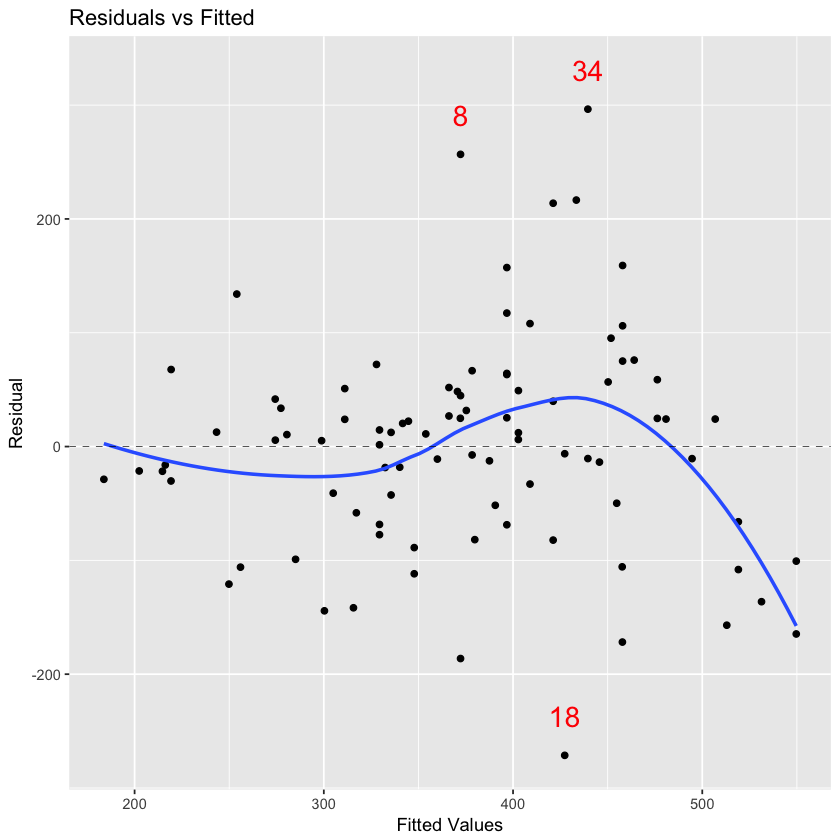

In [50]:
mplot(mod_p_planes, which = 1, system = "ggplot2")


This is a scatterplot of residuals versus fitted (predicted) values. As we observed before, the volume of crossings does not increase as much for warm temperatures as it does for more moderate ones. We may need to consider a more sophisticated model with a more complex model for temperature.

It is important to careful evaluate this scatterplot of residuals vs fitted and look for non random patterns 

![title](residuals.png)

[[1]]


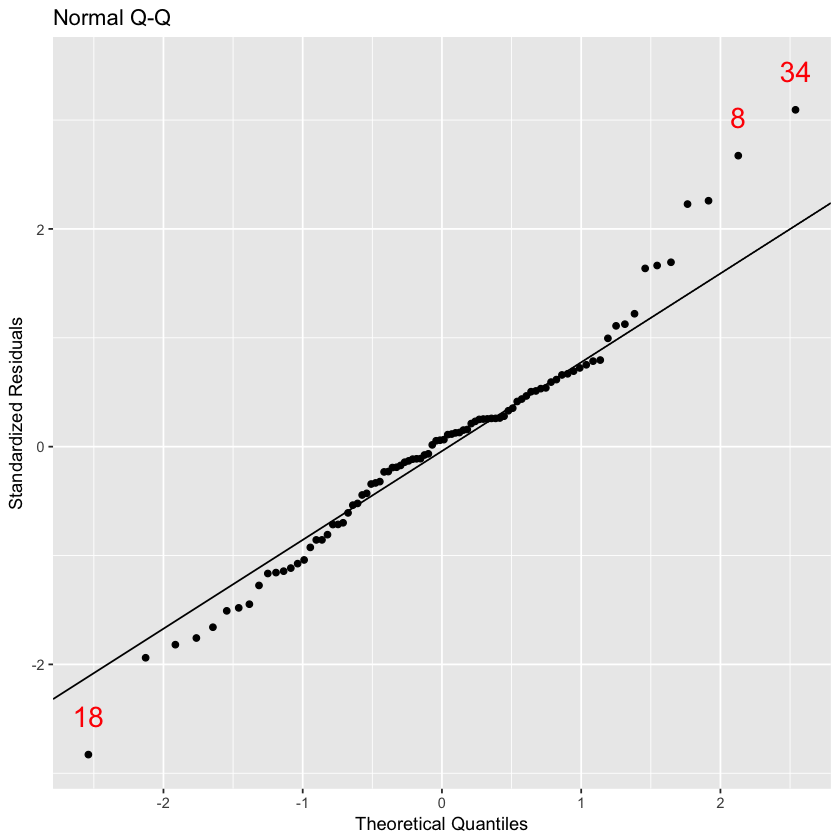

In [51]:
mplot(mod_p_planes, which = 2, system = "ggplot2")

quantile–quantile plot for the residuals from the regression model. The plot deviates from the straight line: This indicates that the residuals have heavier tails than a normal distribution.

`geom_smooth()` using method = 'loess'


[[1]]


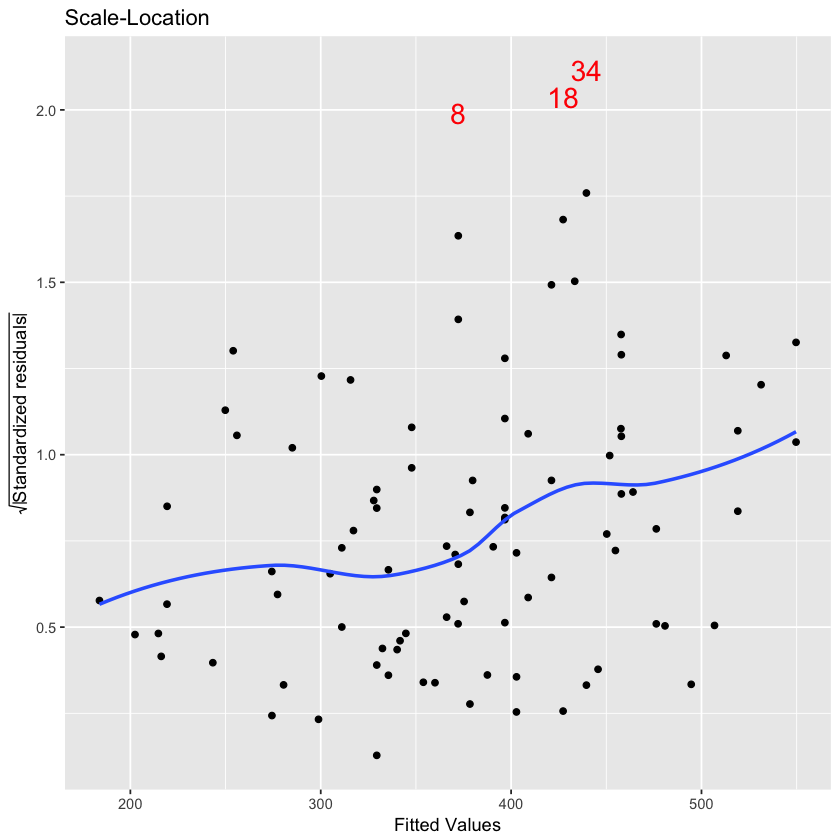

In [52]:
mplot(mod_p_planes, which = 3, system = "ggplot2")

scale–location plot for the residuals from the model: The results indicate that there is evidence of heteroscedasticity (the variance of the residuals increases as a function of predicted value).

When performing model diagnostics, it is important to identify any outliers and under- stand their role in determining the regression coefficients.

-  An outlier is an observation that doesn’t seem to fit the general pattern of the data.
-  An observation with an extreme value of the explanatory variable is a point of high leverage.
-  A high leverage point that exerts disproportionate influence on the slope of the re- gression line is an influential point.

[[1]]


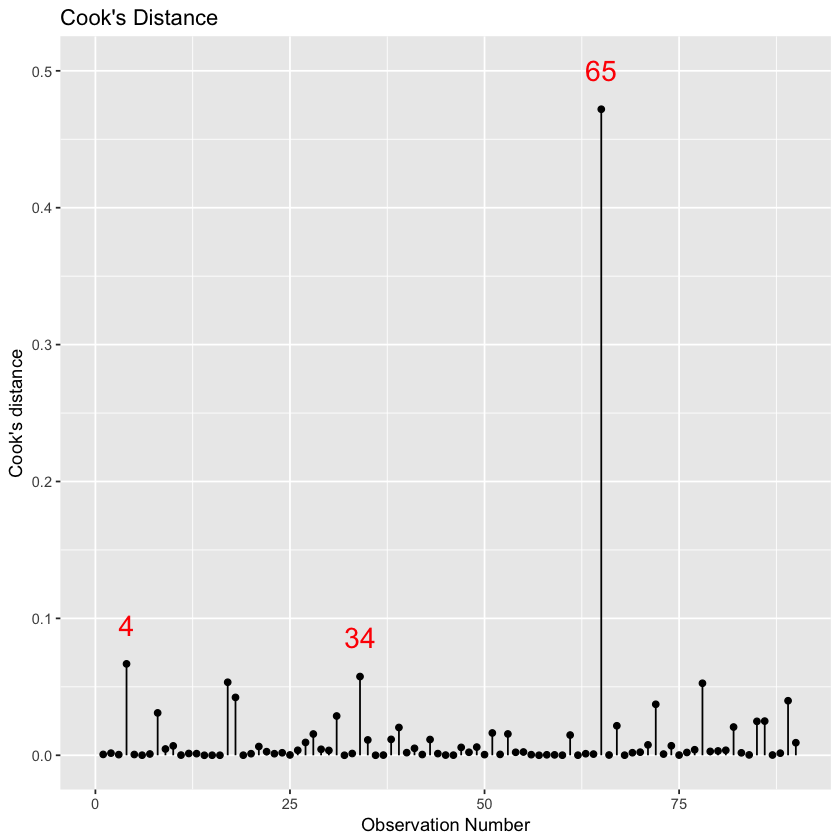

In [53]:
mplot(mod_p_planes, which = 4, system = "ggplot2")

We use the augment() function from the broom package to calculate the value of this statistic and identify the most extreme Cook’s distance.


In [54]:
#install.packages("broom")
library(broom) 
augment(mod_p_planes) %>%
filter(.cooksd > 0.4)
 

Warning message:
“package ‘broom’ was built under R version 3.4.3”

volume,hightemp,precip,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
388,84,1.49,254.0123,55.57366,133.9877,0.3304453,95.61994,0.4719518,1.693763


The outlier corresponds to a day with nearly one and a half inches of rain (the most recorded in the dataset) and a high temperature of 84 degrees.